Case 4 Mathematical Finance

Integration result for alpha=0.5: 23.001234636843797


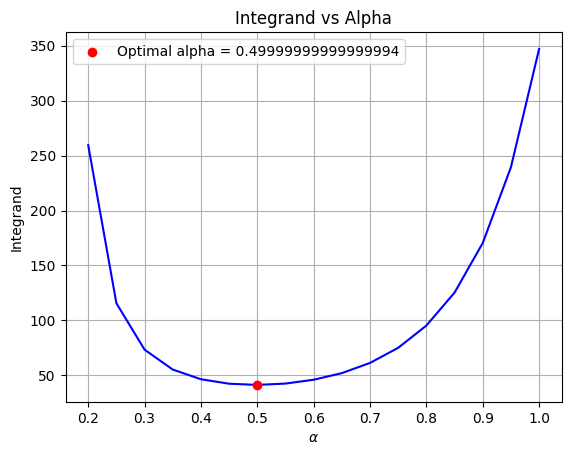

Optimal alpha: 0.49999999999999994


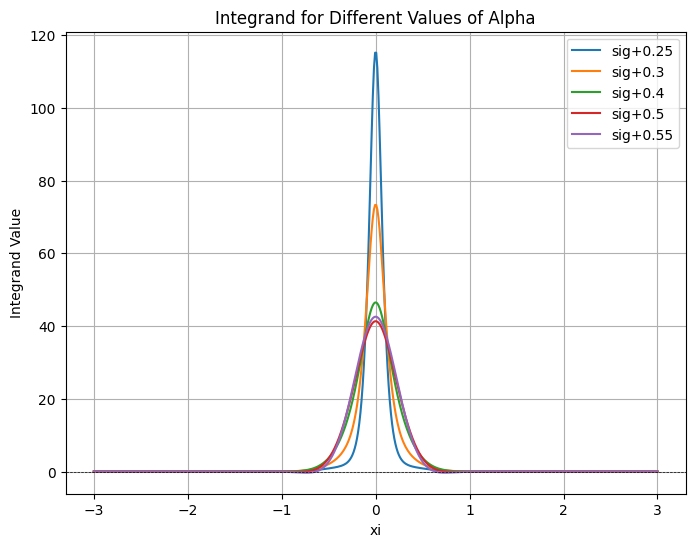

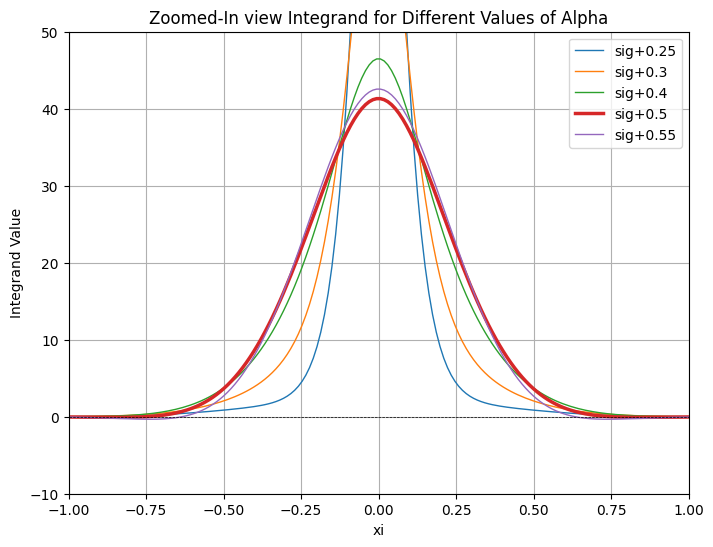

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy import stats
from scipy.integrate import quad

r = 0.01       
sigma = 0.15   
T = 10          
t = 0          
n = 100
K = 100
S0 = 100

# Characteristic function for brownian motion WT | Wt
def charfct(t, Wt, T, xi):
    return np.exp(1j*xi*Wt - (r + 0.5*(xi**2))*(T-t))

def optft(alpha, xi, S0, K, sigma, r, T):
    rsig2t = (r - 0.5 * sigma*sigma) * T

    # wbar = (-rsig2t*T)/sigma
    wbar = (np.log(K/S0) - rsig2t) / sigma
    
    return (-S0 * np.exp(rsig2t + (1j*xi + sigma - alpha) * wbar) / (1j*xi + sigma - alpha) +
          K * np.exp((1j*xi - alpha) * wbar) / (1j*xi - alpha))

#define auxiliary function for integration routine
def ftint2(xi, alpha):
    return np.real(charfct(t, 0, T, (-xi-1j*alpha)) * optft(alpha, xi, S0, K, sigma, r, T))/(2*np.pi)


# Create a function to integrate integrand2 over a range of xi
def integrate_function(alpha):
    result, _ = quad(lambda xi: ftint2(xi, alpha), -np.inf, np.inf)
    return result

# Example calculation
result = integrate_function(0.5)
print(f"Integration result for alpha=0.5: {result}")

# Calculate integrand values for different alpha values
alpha_values = np.arange(0.2, 1.05, 0.05)
integrand_values = []

for alpha in alpha_values:
    integrand_values.append(ftint2(0, alpha))

# Find the alpha value that minimizes the integrand
optimal_alpha = alpha_values[np.argmin(integrand_values)]

# Plotting the results
plt.plot(alpha_values, integrand_values, color='blue')  # Line without markers
plt.scatter(optimal_alpha, np.min(integrand_values), color='red', zorder=5, label=f'Optimal alpha = {optimal_alpha:}', marker='o')  # Red dot
plt.xlabel(r'$\alpha$')
plt.ylabel('Integrand')
plt.title('Integrand vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

print(f"Optimal alpha: {optimal_alpha}")

alpha_values = [0.25, 0.3, 0.4, 0.5, 0.55]
results = []

# Calculate integration for each alpha
for alpha in alpha_values:
    results.append(integrate_function(alpha))

# Plotting
plt.figure(figsize=(8, 6))
xi_range = np.linspace(-3, 3, 500)

for alpha in alpha_values:
    y_values = [ftint2(xi, alpha) for xi in xi_range]
    plt.plot(xi_range, y_values, label=f'sig+{alpha}')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('xi')
plt.ylabel('Integrand Value')
plt.title('Integrand for Different Values of Alpha')

plt.legend()
plt.grid()
plt.show()

# Plotting with zoom and thicker line for alpha=0.5
plt.figure(figsize=(8, 6))
xi_range = np.linspace(-3, 3, 500)

for alpha in alpha_values:
    y_values = [ftint2(xi, alpha) for xi in xi_range]
    if alpha == 0.5:  # Highlight the line for alpha=0.5
        plt.plot(xi_range, y_values, label=f'sig+{alpha}', linewidth=2.5)
    else:
        plt.plot(xi_range, y_values, label=f'sig+{alpha}', linewidth=1.0)

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('xi')
plt.ylabel('Integrand Value')
plt.title('Zoomed-In view Integrand for Different Values of Alpha')

# Adjust the limits for a closer view
plt.xlim(-1, 1)  # Narrowing the x-axis range
plt.ylim(-10, 50)  # Adjust the y-axis range to focus on the most relevant values

plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
r = 0.01
sigma = 0.15
T = 10
t = 0
K = 100
S0 = 100

# Characteristic function for Brownian motion WT | Wt
def charfct(t, Wt, T, xi):
   return np.exp(1j*xi*Wt - (r + 0.5*(xi**2))*(T-t))

# Fourier Transform of tilted option payoff
def optft(alpha, xi, S0, K, sigma, r, T):
   rsig2t = (r - 0.5 * sigma*sigma) * T
   wbar = (np.log(K/S0) - rsig2t) / sigma
   return (-S0 * np.exp(rsig2t + (1j*xi + sigma - alpha) * wbar) / (1j*xi + sigma - alpha) +
           K * np.exp((1j*xi - alpha) * wbar) / (1j*xi - alpha))

# Define auxiliary function for integration
def ftint2(xi, alpha):
   return np.real(charfct(t, 0, T, (-xi-1j*alpha)) * 
                 optft(alpha, xi, S0, K, sigma, r, T))/(2*np.pi)

# Integration function
def integrate_function(alpha):
   result, _ = quad(lambda xi: ftint2(xi, alpha), -np.inf, np.inf)
   return result

# Calculate optimal alpha
alpha_values = np.arange(0.2, 1.05, 0.05)
integrand_values = []
for alpha in alpha_values:
   integrand_values.append(ftint2(0, alpha))

optimal_alpha = alpha_values[np.argmin(integrand_values)]

# Plot 1: Integrand vs Alpha
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, integrand_values, color='blue')
plt.scatter(optimal_alpha, np.min(integrand_values), color='red', zorder=5, 
          label=f'Optimal alpha = {optimal_alpha:.2f}', marker='o')
plt.xlabel(r'$\alpha$')
plt.ylabel('Integrand')
plt.title('Integrand vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

# Do numerical integration for different alpha values
alpha_values = [sigma + x for x in [0.25, 0.3, 0.4, 0.5, 0.55]]
for alpha in alpha_values:
   result = quad(lambda x: ftint2(x, alpha), -np.inf, np.inf)
   print(f'sig+{alpha-sigma:.1f}=', result)

# Plot 2: Integrand for different alpha values
alpha_test_values = [0.25, 0.3, 0.4, 0.5, 0.55]
xi_range = np.linspace(-3, 3, 500)
plt.figure(figsize=(8, 6))
for alpha in alpha_test_values:
   y_values = [ftint2(xi, alpha) for xi in xi_range]
   plt.plot(xi_range, y_values, label=f'sig+{alpha}')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('xi')
plt.ylabel('Integrand Value')
plt.title('Integrand for Different Values of Alpha')
plt.legend()
plt.grid()
plt.show()

# Plot 3: Zoomed view
plt.figure(figsize=(8, 6))
for alpha in alpha_test_values:
   y_values = [ftint2(xi, alpha) for xi in xi_range]
   if alpha == 0.5:
       plt.plot(xi_range, y_values, label=f'sig+{alpha}', linewidth=2.5)
   else:
       plt.plot(xi_range, y_values, label=f'sig+{alpha}', linewidth=1.0)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('xi')
plt.ylabel('Integrand Value')
plt.title('Zoomed-In view Integrand for Different Values of Alpha')
plt.xlim(-1, 1)
plt.ylim(-10, 50)
plt.legend()
plt.grid()
plt.show()

# Calculate final price with optimal alpha
final_price = integrate_function(0.5)  # Using alpha = 0.5 as optimal
print(f"\nFinal option price with alpha = 0.5:")
print(f"{final_price}")
